## data prepocessing

In [1]:
#Used to work with data in the form of DataFrames
import pandas as pd 

#StandardScaler is used to standardize (normalize) features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler 

#used to save and load Python objects efficiently, such as machine learning models or data preprocessing objects (like scalers).
import joblib


# Load the final dataset
df = pd.read_csv("C:\\Users\\Stariz\\Desktop\\Research Final\\game_data_with_improvement.csv")

# Remove the timestamp column as it's not necessary for the model
df = df.drop(columns=["timestamp"])

# Separate X and y
X = df.drop(columns=["improvement_score"])
y = df["improvement_score"]

# Initialize StandardScaler for X and y
scaler_X = StandardScaler() #initializes a StandardScaler object for scaling the input features X which will scale the features to have a mean of 0 and a standard deviation of 1.
scaler_y = StandardScaler() #nitializes another StandardScaler object for scaling the target variable y. It's important to scale the target variable when the model will output continuous values that can vary significantly.

# Fit and transform X and y using the scalers

#fit: It calculates the mean and standard deviation of the features in X & the target variable Y.
#transform: It then uses those values to scale the features in X & the target variable Y. so that they have a mean of 0 and a standard deviation of 1.
# y.values.reshape(-1, 1) is used to ensure y has the right shape (it needs to be a 2D array for the scaler)

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Save the scalers separately

#This saves the scaler_X (the scaler for the input features) to a file named scaler_X.pkl using joblib. The saved file can later be loaded and used to scale new data using the same transformation as the training data.
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

print("Data preprocessing complete.")

Data preprocessing complete.


## model training

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


In [5]:
# Load the scalers
scaler_X = joblib.load("C:\\Users\\Stariz\\Desktop\\Research Final\\models\\scaler_X.pkl")
scaler_y = joblib.load("C:\\Users\\Stariz\\Desktop\\Research Final\\models\\scaler_y.pkl")

C:\Users\Stariz\Anaconda new\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
# Separate X and y
X = df.drop(columns=["improvement_score"])
y = df["improvement_score"].ravel()

#.ravel() function is used to flatten the y array, as it may be a 2D array but a 1D array is expected by most machine learning models

print(y)


# Scale the dataset

#(standardizing it by removing the mean and scaling it to unit variance). 
# This step ensures that the features are on the same scale, which is important for many machine learning algorithms
X_scaled = scaler_X.transform(X)
y_scaled = scaler_y.transform(y.reshape(-1, 1))
#reshape(-1, 1) is used to ensure that y is in the correct shape for scaling (a 2D array).
print(y_scaled)

[5.5176393  4.36781706 5.38665977 ... 9.59458396 8.47310489 4.36978483]
[[-0.821198  ]
 [-1.55962799]
 [-0.90531467]
 ...
 [ 1.79706602]
 [ 1.07683836]
 [-1.55836427]]


C:\Users\Stariz\AppData\Local\Temp\ipykernel_19540\1826256350.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df["improvement_score"].ravel()


In [7]:
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
#random_state=42: Sets the seed for reproducibility. It ensures that every time you run the code, you get the same split.

### RF

In [9]:
# Create and train a Random Forest Regressor model
#a machine learning model that uses an ensemble method (i.e., it builds multiple decision trees and combines them for a more accurate prediction). 
#It is a regression model used for predicting continuous values

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#n_estimators=100: This sets the number of trees in the random forest. Each tree is built using a random subset of the data. 
#The more trees, the more robust the model generally is. 100 is a common value for n_estimators.

# random_state=42 ensures that the model will produce the same results each time it is run, given the same input data

rf_model.fit(X_train, y_train.ravel()) #The fit function trains the model.
#ravel() function flattens the y_train array into a 1D array


RandomForestRegressor(random_state=42)

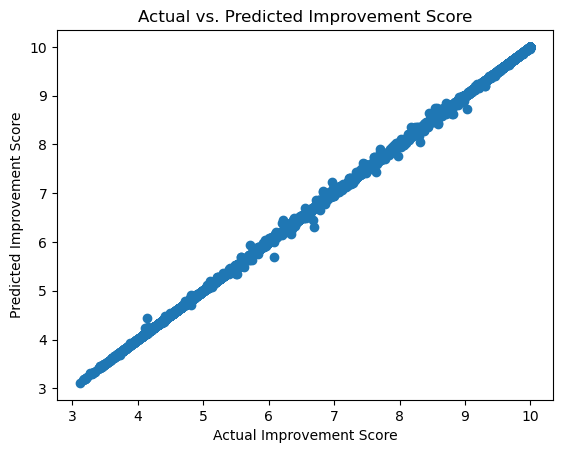

In [10]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)  #make predictions on new (unseen) data. 

# Inverse transform to get back the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted vs. actual improvement scores
plt.scatter(y_test_original_scale, y_pred_original_scale)
plt.xlabel("Actual Improvement Score")
plt.ylabel("Predicted Improvement Score")
plt.title("Actual vs. Predicted Improvement Score")
plt.show()

In [11]:
import joblib

# used to save the trained model to a file. rf_model is the trained Random Forest model.
joblib.dump(rf_model, "rf_model.pkl")

#can load this model later without needing to retrain it

print("Model saved as 'rf_model.pkl'.")

Model saved as 'rf_model.pkl'.


### LR

In [13]:
# Step 4: Train the Model

#a supervised learning algorithm used for predicting continuous values based on one or more input features. 
#It fits a linear relationship between the dependent (target) variable and independent (input) variables.

model_LR = LinearRegression()
model_LR.fit(X_train, y_train.ravel())

LinearRegression()

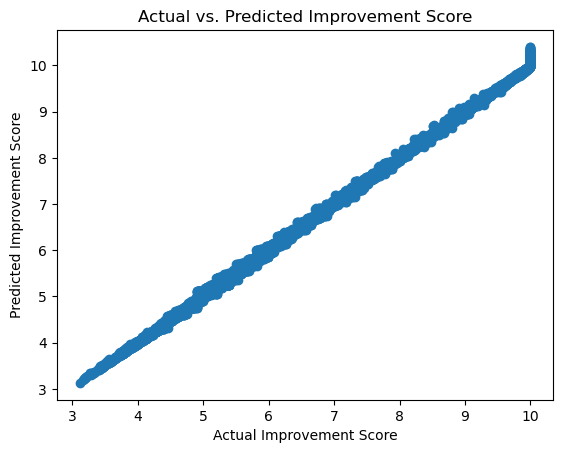

In [27]:
# Make predictions on the test set
y_pred = model_LR.predict(X_test)

# Inverse transform to get back the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted vs. actual improvement scores
plt.scatter(y_test_original_scale, y_pred_original_scale)
plt.xlabel("Actual Improvement Score")
plt.ylabel("Predicted Improvement Score")
plt.title("Actual vs. Predicted Improvement Score")
plt.show()

In [15]:
import joblib

# Save the trained model to a file
joblib.dump(model_LR, "LR_model.pkl")

print("Model saved as 'LR_model.pkl'.")

Model saved as 'LR_model.pkl'.


### Calculate Evaluation Metrics

### RF model

In [16]:

mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
#average squared difference between the actual and predicted values. It penalizes larger errors more heavily.
#The higher the MSE, the worse the model's performance


r2 = r2_score(y_test_original_scale, y_pred_original_scale)  #r2_score: Measures how well the model's predictions fit the data
# this value ranges from 0 to 1. A value of 1 means perfect predictions, while 0 means the model does not explain any of the variability in the target variable.


# Training accuracy
#To measure the model's performance on the training data

#predicts the target values on the training set (X_train) and the R² score is calculated using the true values (y_train) and predicted values (y_train_pred). 
#This tells you how well the model fits the training data.
y_train_pred = rf_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Testing accuracy
# measure the model's performance on the testing data
#  assess how well the model generalizes to unseen data
test_r2 = r2_score(y_test, y_pred)

print(f"Training R2 Score: {train_r2:.2f}")
print(f"Testing R2 Score: {test_r2:.2f}")


# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale) #Measures the average magnitude of the errors in predictions
#average of the absolute differences between the actual and predicted values

rmse = mean_squared_error(y_test_original_scale, y_pred_original_scale, squared=False) #Measures the average squared difference between actual and predicted values.
#how much error there is in the predictions in terms of the original units of the target variable

explained_variance = explained_variance_score(y_test_original_scale, y_pred_original_scale)
#calculates how much of the variance in the true values (y_test_original_scale) can be explained by the predicted values (y_pred_original_scale).
# A value close to 1 means the model does a good job of capturing the variance, while a value close to 0 means it doesn’t.


# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")

Training R2 Score: 1.00
Testing R2 Score: 1.00
Mean Squared Error: 0.00
Mean Absolute Error (MAE): 0.02
Root Mean Squared Error (RMSE): 0.04
Explained Variance Score: 1.00


C:\Users\Stariz\Anaconda new\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##LR model

In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2 = r2_score(y_test_original_scale, y_pred_original_scale)

# Training accuracy
y_train_pred = model_LR.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Testing accuracy
test_r2 = r2_score(y_test, y_pred)

print(f"Training R2 Score: {train_r2:.2f}")
print(f"Testing R2 Score: {test_r2:.2f}")


# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
rmse = mean_squared_error(y_test_original_scale, y_pred_original_scale, squared=False)
explained_variance = explained_variance_score(y_test_original_scale, y_pred_original_scale)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")

Training R2 Score: 1.00
Testing R2 Score: 1.00
Mean Squared Error: 0.00
Mean Absolute Error (MAE): 0.02
Root Mean Squared Error (RMSE): 0.04
Explained Variance Score: 1.00


C:\Users\Stariz\Anaconda new\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Inference

In [28]:
%%writefile predict_improvement_score.py

import joblib
import numpy as np
import warnings #This module is used to control the display of warning messages

# Load the saved model and scalers
#rf_model = joblib.load("/content/rf_model.pkl")
LR_model=joblib.load("C:\\Users\\Stariz\\Desktop\\Research Final\\models\\LR_model.pkl")
scaler_X = joblib.load("C:\\Users\\Stariz\\Desktop\\Research Final\\models\\scaler_X.pkl")
scaler_y = joblib.load("C:\\Users\\Stariz\\Desktop\\Research Final\\models\\scaler_y.pkl")

def predict_improvement_score(success_count, attempt_count, game_score_xp, game_level,engagement_time_Total_sec):
    # Prepare the user inputs as a numpy array
    user_inputs = np.array([success_count, attempt_count, game_score_xp, game_level,engagement_time_Total_sec]).reshape(1, -1)
    # .reshape(1, -1) part is necessary because the model expects the inputs to be in the form of a 2D array (one sample, multiple features).

    # Disable warnings
    warnings.filterwarnings("ignore") # temporarily suppresses warning messages

    # Scale the user inputs using the loaded scalers
    user_inputs_scaled = scaler_X.transform(user_inputs)

    # Enable warnings again
    warnings.filterwarnings("default") #After the prediction step, the warnings are re-enabled.

    # Make the prediction using the loaded model
    predicted_score_scaled =LR_model.predict(user_inputs_scaled)
 8746tfjbn1eqcgrecq score back to the original scale
    predicted_score = scaler_y.inverse_transform(predicted_score_scaled.reshape(1, -1))

    return predicted_score[0][0] * 10



Overwriting predict_improvement_score.py


In [30]:
# Import the function from the script
from predict_improvement_score import predict_improvement_score

# Example usage:
success_count = 5
attempt_count = 5
game_score_xp = 100
game_level = 15
engagement_time_Total_sec = 180

predicted_improvement_score = predict_improvement_score(success_count, attempt_count, game_score_xp, game_level,engagement_time_Total_sec)

print(f"Predicted Improvement Score: {predicted_improvement_score:.2f}%")

Predicted Improvement Score: 98.70%


C:\Users\Stariz\Anaconda new\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Stariz\Anaconda new\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [33]:
import os
os.getcwd()

'C:\\Users\\Stariz\\Desktop\\Research Final'

In [32]:
os.chdir("C:\\Users\\Stariz\\\Desktop\\Research Final")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Stariz\AppData\Local\Temp\ipykernel_19540\2455879299.py:1: SyntaxWarning: invalid escape sequence '\D'
  os.chdir("C:\\Users\\Stariz\\\Desktop\\Research Final")
